In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('hospital_stay_data.csv')

# View first few rows
print(df.head())


   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [6]:
print(df.isnull().sum())


eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64


In [10]:
# Numeric columns
numeric_cols = ['lengthofstay','rcount','bmi','pulse','respiration','hematocrit',
                'neutrophils','sodium','glucose','bloodureanitro','creatinine']

for col in numeric_cols:
    if col in df.columns:
        # Convert to numeric, coerce errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Fill missing with median
        df[col] = df[col].fillna(df[col].median())

# Categorical columns
categorical_cols = ['gender','dialysisrenalendstage','asthma','irondef','pneum',
                    'substancedependence','psychologicaldisordermajor','depress',
                    'psychother','fibrosisandother','malnutrition','hemo',
                    'secondarydiagnosisnonicd9','discharged','facid']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Verify no missing values
print(df.isnull().sum())



eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64


In [11]:
# Convert categorical columns
categorical_cols = ['gender','dialysisrenalendstage','asthma','irondef','pneum',
                    'substancedependence','psychologicaldisordermajor','depress',
                    'psychother','fibrosisandother','malnutrition','hemo',
                    'secondarydiagnosisnonicd9','discharged','facid']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert date column
if 'vdate' in df.columns:
    df['vdate'] = pd.to_datetime(df['vdate'])

# Verify
print(df.dtypes)


eid                                    int64
vdate                         datetime64[ns]
rcount                               float64
gender                              category
dialysisrenalendstage               category
asthma                              category
irondef                             category
pneum                               category
substancedependence                 category
psychologicaldisordermajor          category
depress                             category
psychother                          category
fibrosisandother                    category
malnutrition                        category
hemo                                category
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

In [16]:
# -----------------------------
# Feature Engineering
# -----------------------------

# List of comorbidity columns
comorbidity_cols = ['asthma','irondef','pneum','substancedependence',
                    'psychologicaldisordermajor','depress','psychother',
                    'fibrosisandother','malnutrition','hemo']

# Convert categorical 0/1 to numeric int
for col in comorbidity_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

# Count number of comorbidities per patient
df['comorbidity_count'] = df[comorbidity_cols].sum(axis=1)

# Flag high-risk patients (3+ comorbidities)
df['high_risk'] = df['comorbidity_count'].apply(lambda x: 'Yes' if x>=3 else 'No')

# Example: Calculate Cost per Day if 'cost' exists
if 'cost' in df.columns:
    df['cost_per_day'] = df['cost'] / df['lengthofstay']

# Extract visit month/year from vdate
df['visit_month'] = df['vdate'].dt.month
df['visit_year'] = df['vdate'].dt.year

# Verify new features
print(df[['comorbidity_count','high_risk','visit_month','visit_year']].head())




   comorbidity_count high_risk  visit_month  visit_year
0                  0        No            8        2012
1                  0        No            5        2012
2                  0        No            9        2012
3                  0        No            8        2012
4                  2        No           12        2012


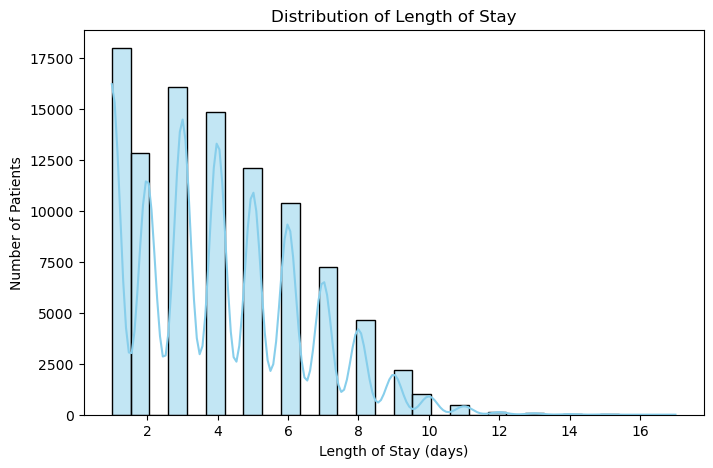

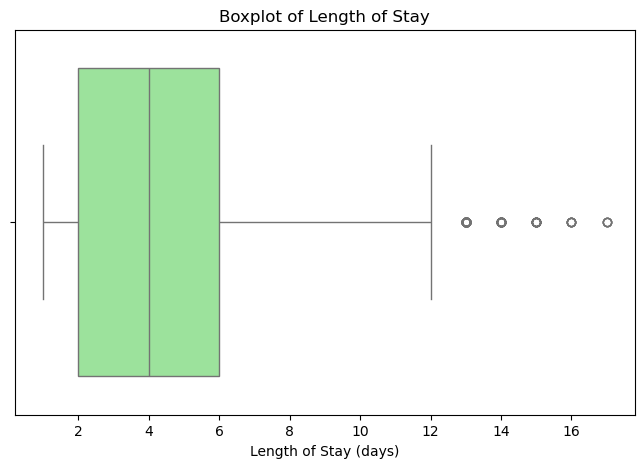

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Length of Stay
plt.figure(figsize=(8,5))
sns.histplot(df['lengthofstay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Patients')
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(x=df['lengthofstay'], color='lightgreen')
plt.title('Boxplot of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.show()


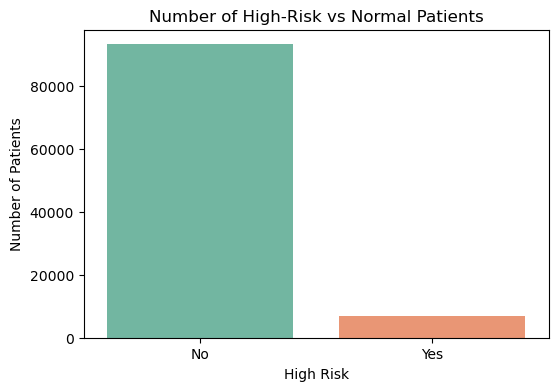

In [20]:
# Countplot for High-Risk patients
plt.figure(figsize=(6,4))
sns.countplot(x='high_risk', data=df, hue='high_risk', palette='Set2', dodge=False, legend=False)
plt.title('Number of High-Risk vs Normal Patients')
plt.xlabel('High Risk')
plt.ylabel('Number of Patients')
plt.show()




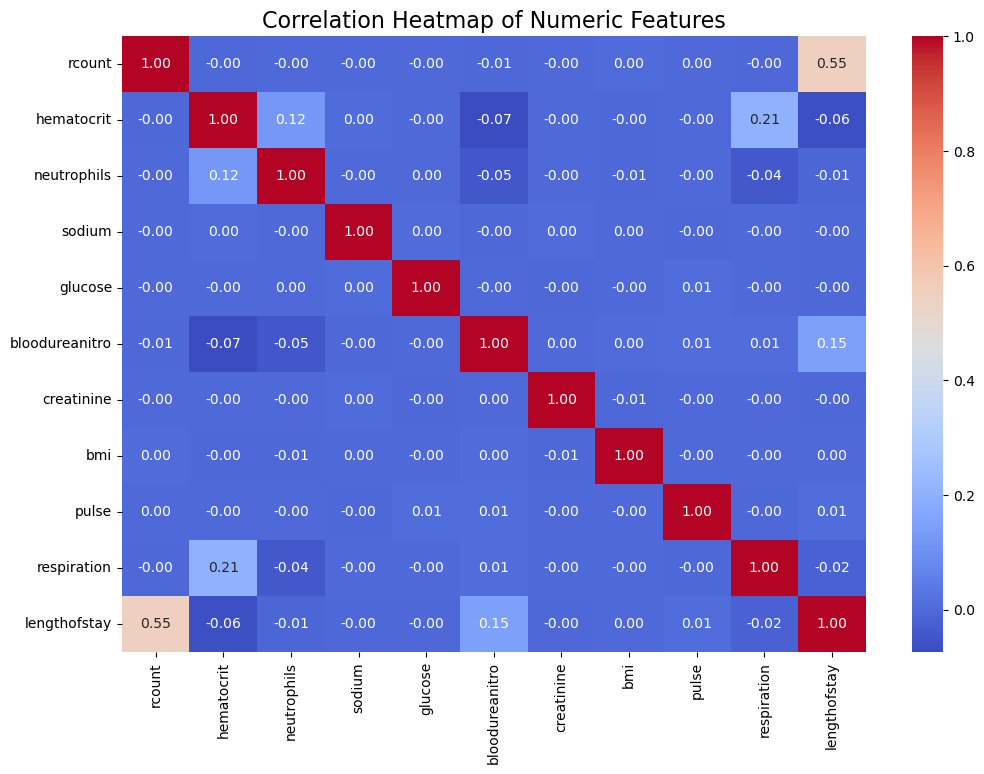

In [21]:
# Select numeric columns for correlation
numeric_cols = ['rcount','hematocrit','neutrophils','sodium','glucose',
                'bloodureanitro','creatinine','bmi','pulse','respiration','lengthofstay']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


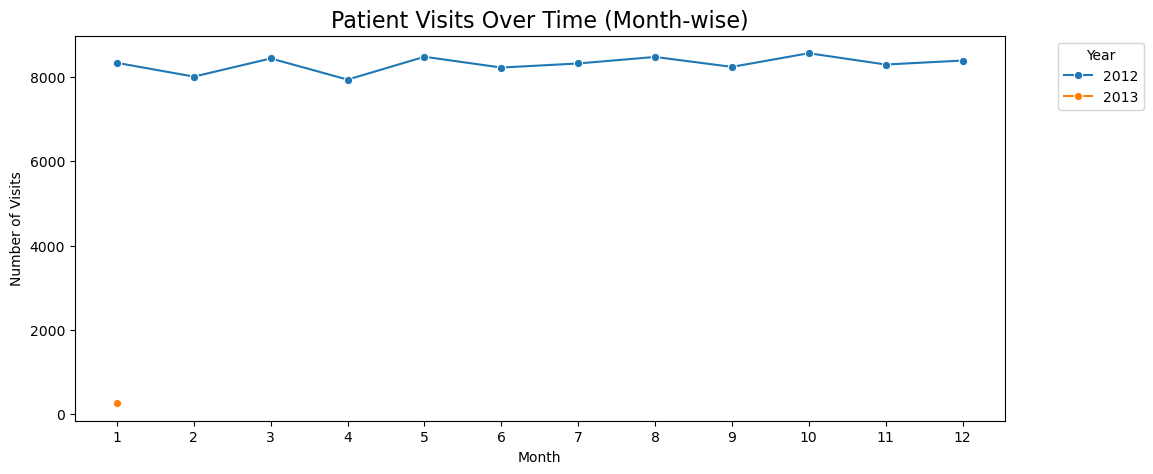

In [22]:
# Aggregate visits by year and month
visits_per_month = df.groupby(['visit_year', 'visit_month']).size().reset_index(name='num_visits')

# Plot line chart
plt.figure(figsize=(12,5))
sns.lineplot(
    x='visit_month', 
    y='num_visits', 
    hue='visit_year', 
    data=visits_per_month, 
    marker='o', 
    palette='tab10'
)
plt.title('Patient Visits Over Time (Month-wise)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(range(1,13))  # Show all months
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\rjimm\AppData\Local\Temp\ipykernel_13620\1699822442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='high_risk', y='lengthofstay', data=df, palette='Set3')


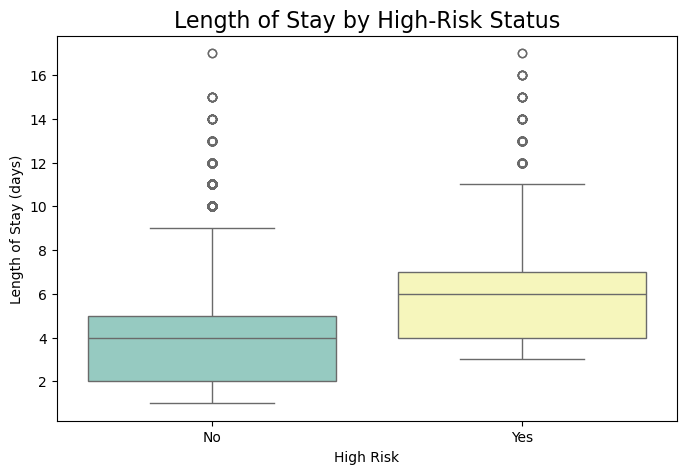

In [23]:
# Boxplot: Length of Stay for High-Risk vs Normal Patients
plt.figure(figsize=(8,5))
sns.boxplot(x='high_risk', y='lengthofstay', data=df, palette='Set3')
plt.title('Length of Stay by High-Risk Status', fontsize=16)
plt.xlabel('High Risk')
plt.ylabel('Length of Stay (days)')
plt.show()


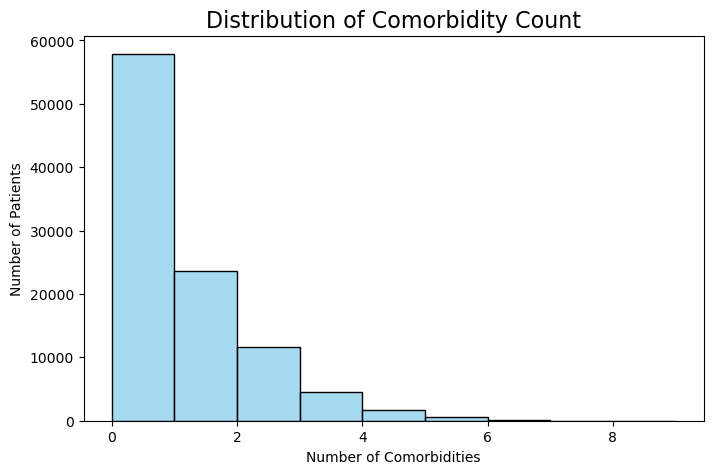

In [24]:
# Histogram: Comorbidity count
plt.figure(figsize=(8,5))
sns.histplot(df['comorbidity_count'], bins=range(0, df['comorbidity_count'].max()+2), 
             color='skyblue', kde=False)
plt.title('Distribution of Comorbidity Count', fontsize=16)
plt.xlabel('Number of Comorbidities')
plt.ylabel('Number of Patients')
plt.show()


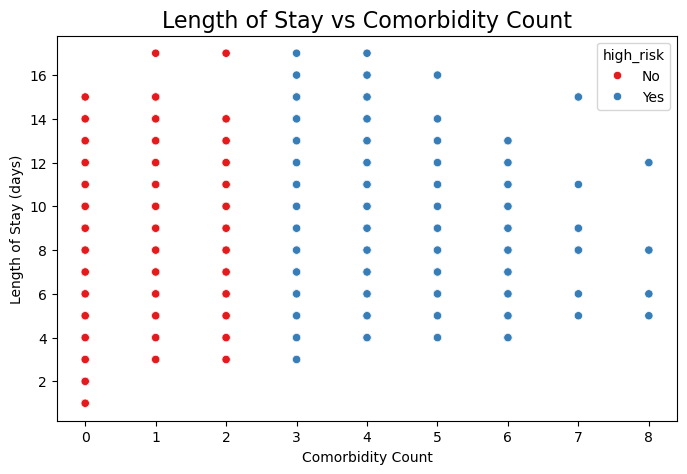

In [25]:
# Scatterplot: Length of Stay vs Comorbidity Count
plt.figure(figsize=(8,5))
sns.scatterplot(x='comorbidity_count', y='lengthofstay', data=df, hue='high_risk', palette='Set1')
plt.title('Length of Stay vs Comorbidity Count', fontsize=16)
plt.xlabel('Comorbidity Count')
plt.ylabel('Length of Stay (days)')
plt.show()


In [27]:
# Summary Insights

# High-risk patients count
high_risk_count = df['high_risk'].value_counts()
print("High-Risk vs Normal Patients:\n", high_risk_count, "\n")

# Average length of stay
avg_los = df.groupby('high_risk')['lengthofstay'].mean()
print("Average Length of Stay by Risk Status:\n", avg_los, "\n")

# Comorbidity count distribution
comorbidity_summary = df['comorbidity_count'].describe()
print("Comorbidity Count Summary:\n", comorbidity_summary, "\n")

# Top months with highest patient visits
top_months = df.groupby('visit_month').size().sort_values(ascending=False).head(5)
print("Top 5 Months with Most Patient Visits:\n", top_months)



High-Risk vs Normal Patients:
 high_risk
No     93100
Yes     6900
Name: count, dtype: int64 

Average Length of Stay by Risk Status:
 high_risk
No     3.856155
Yes    5.955797
Name: lengthofstay, dtype: float64 

Comorbidity Count Summary:
 count    100000.000000
mean          0.707080
std           1.031256
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: comorbidity_count, dtype: float64 

Top 5 Months with Most Patient Visits:
 visit_month
1     8600
10    8566
5     8482
8     8478
3     8442
dtype: int64


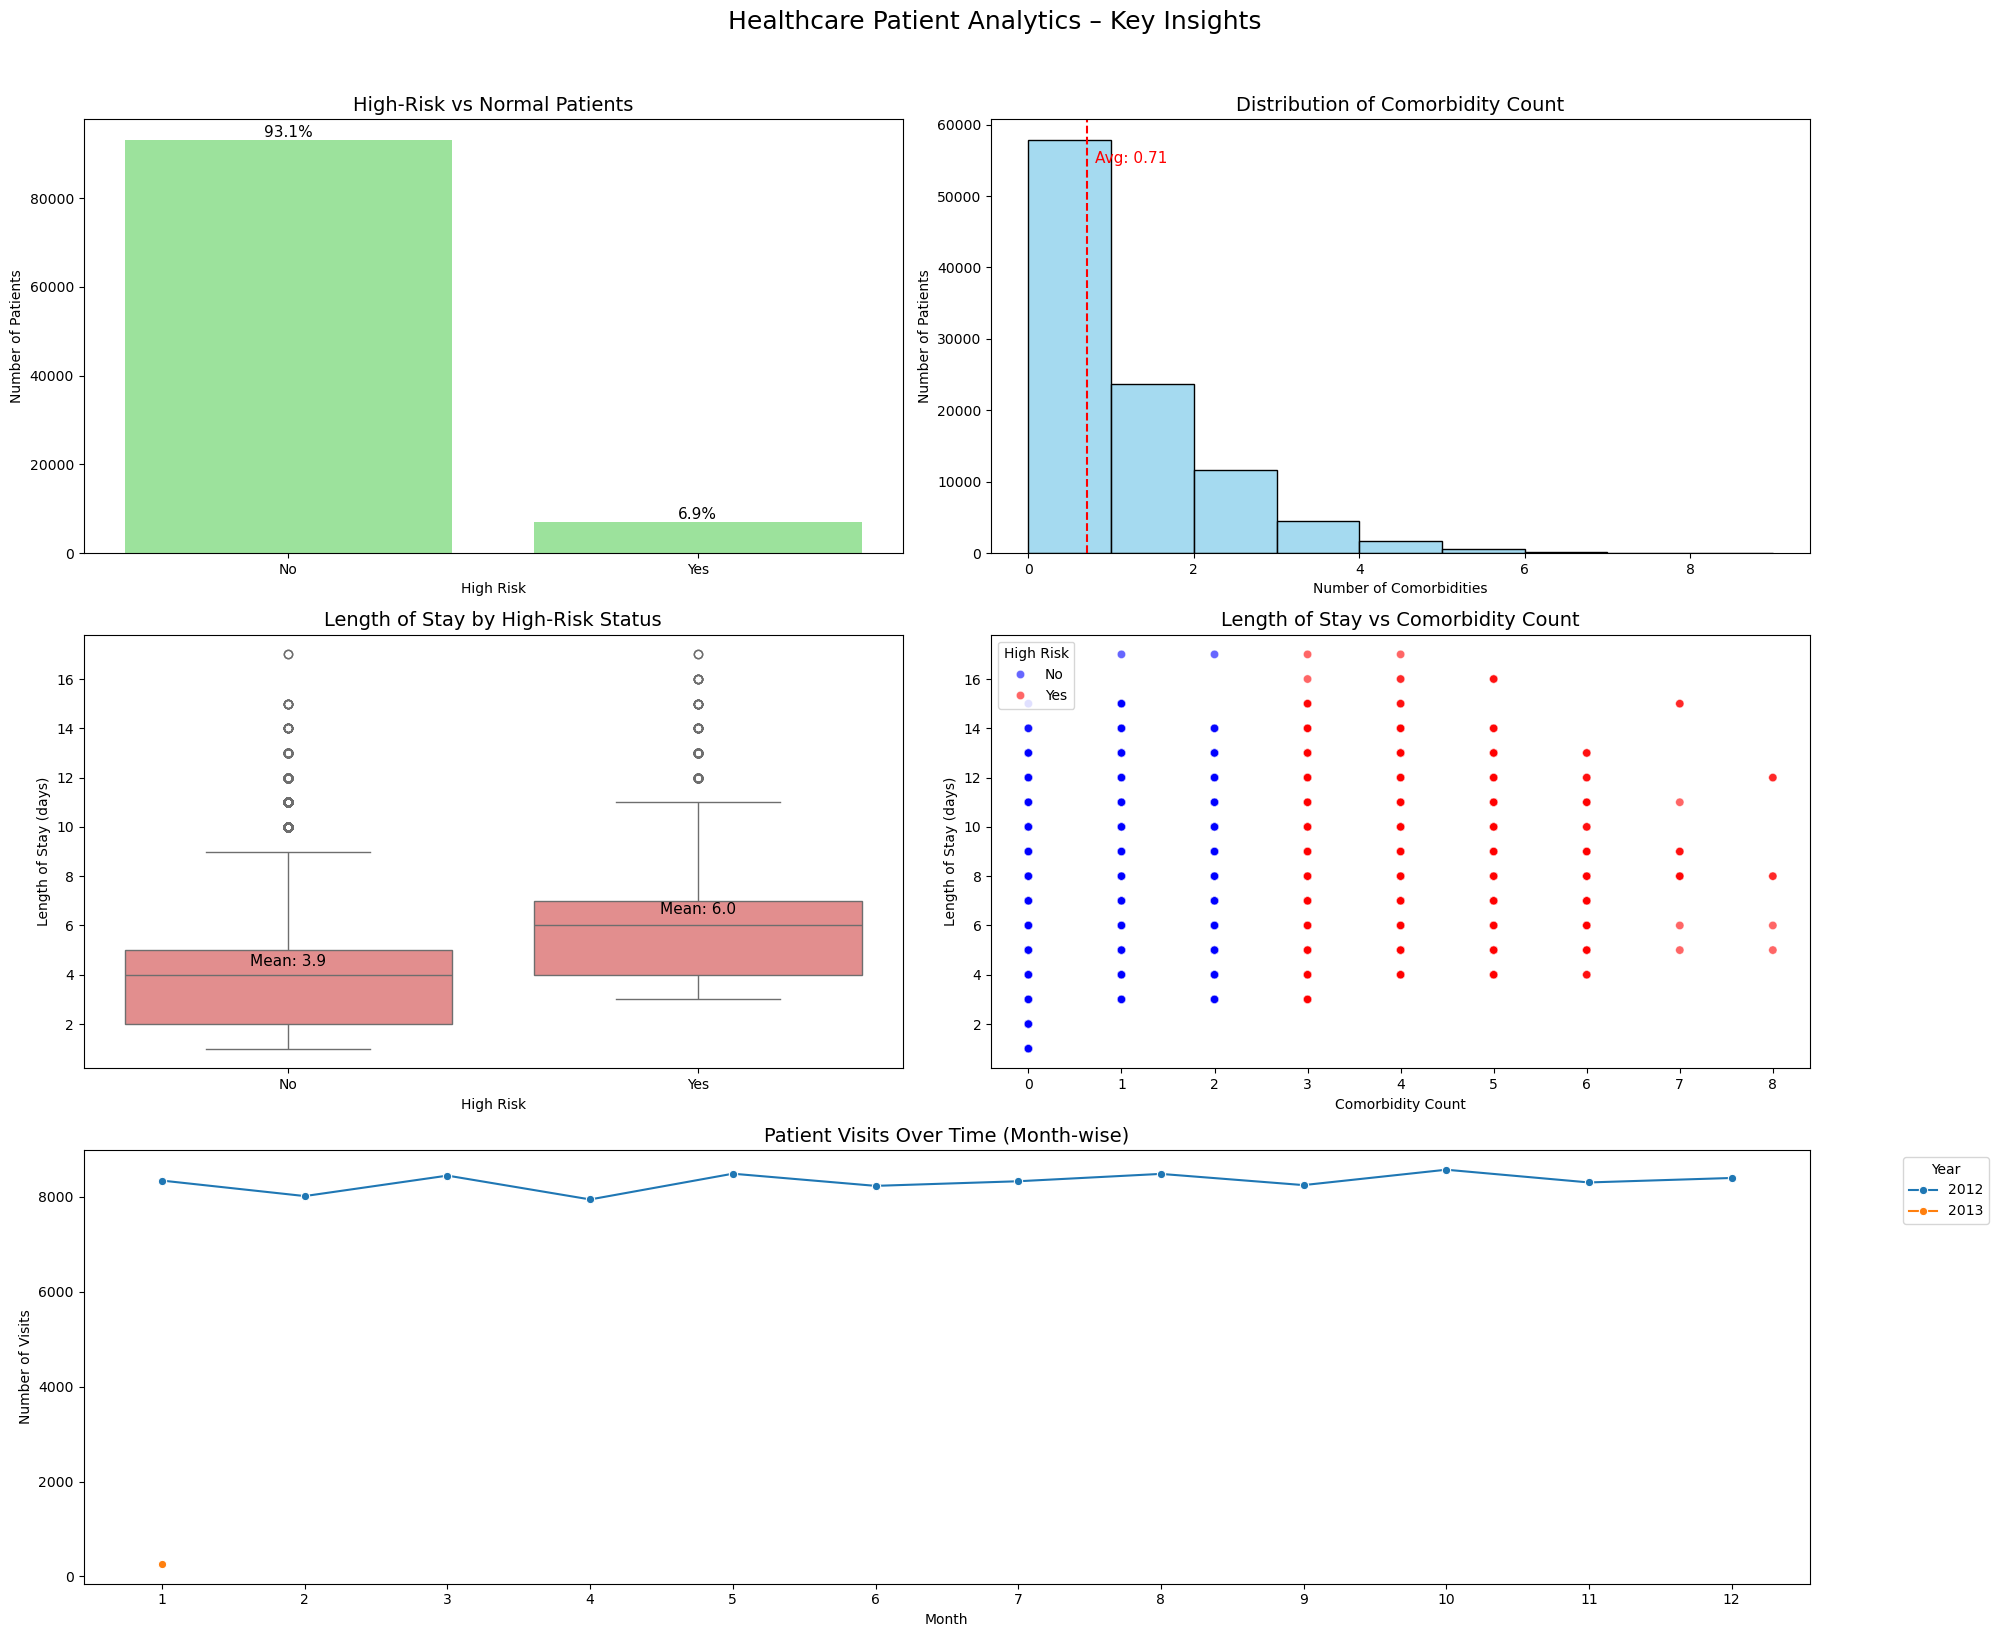

In [33]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(20,16))
gs = gridspec.GridSpec(3, 2)

# 1️⃣ High-Risk Count
ax0 = plt.subplot(gs[0,0])
sns.countplot(x='high_risk', data=df, color='lightgreen', ax=ax0)
ax0.set_title('High-Risk vs Normal Patients', fontsize=14)
ax0.set_xlabel('High Risk')
ax0.set_ylabel('Number of Patients')

# Annotate percentages
total = len(df)
for p in ax0.patches:
    height = p.get_height()
    percent = f'{100*height/total:.1f}%'
    ax0.annotate(percent, (p.get_x() + p.get_width()/2., height),
                 ha='center', va='bottom', fontsize=11, color='black')

# 2️⃣ Comorbidity Count Distribution
ax1 = plt.subplot(gs[0,1])
sns.histplot(df['comorbidity_count'], bins=range(0, df['comorbidity_count'].max()+2),
             color='skyblue', kde=False, ax=ax1)
ax1.set_title('Distribution of Comorbidity Count', fontsize=14)
ax1.set_xlabel('Number of Comorbidities')
ax1.set_ylabel('Number of Patients')

# Annotate average comorbidity
avg_comorb = df['comorbidity_count'].mean()
ax1.axvline(avg_comorb, color='red', linestyle='--')
ax1.text(avg_comorb+0.1, ax1.get_ylim()[1]*0.9, f'Avg: {avg_comorb:.2f}', color='red', fontsize=11)

# 3️⃣ Length of Stay by High-Risk
ax2 = plt.subplot(gs[1,0])
sns.boxplot(x='high_risk', y='lengthofstay', data=df, color='lightcoral', ax=ax2)
ax2.set_title('Length of Stay by High-Risk Status', fontsize=14)
ax2.set_xlabel('High Risk')
ax2.set_ylabel('Length of Stay (days)')

# Annotate mean LOS
for i, hr in enumerate(['No', 'Yes']):
    mean_los = df[df['high_risk']==hr]['lengthofstay'].mean()
    ax2.text(i, mean_los+0.5, f'Mean: {mean_los:.1f}', ha='center', color='black', fontsize=11)

# 4️⃣ Length of Stay vs Comorbidity Count
ax3 = plt.subplot(gs[1,1])
sns.scatterplot(x='comorbidity_count', y='lengthofstay', data=df, hue='high_risk',
                palette={'No':'blue','Yes':'red'}, ax=ax3, alpha=0.6)
ax3.set_title('Length of Stay vs Comorbidity Count', fontsize=14)
ax3.set_xlabel('Comorbidity Count')
ax3.set_ylabel('Length of Stay (days)')
ax3.legend(title='High Risk', loc='upper left')

# 5️⃣ Patient Visits Over Time
ax4 = plt.subplot(gs[2,:])
visits_per_month = df.groupby(['visit_year', 'visit_month']).size().reset_index(name='num_visits')
sns.lineplot(x='visit_month', y='num_visits', hue='visit_year', data=visits_per_month,
             marker='o', palette='tab10', ax=ax4)
ax4.set_title('Patient Visits Over Time (Month-wise)', fontsize=14)
ax4.set_xlabel('Month')
ax4.set_ylabel('Number of Visits')
ax4.set_xticks(range(1,13))
ax4.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Healthcare Patient Analytics – Key Insights', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()



